# Dask Arrays from file

This is an example from [martindurant's repo](https://github.com/martindurant/dask-tutorial-scipy-2018). There you can find much more examples. [Here](https://www.youtube.com/watch?v=mqdglv9GnM8) you can find the fantastic presentation for which this repository was made. 

In [23]:
import os
import h5py
import dask.array as da
import matplotlib.pyplot as plt

We are working here with global weather data in hdf5 format (Hierarchical Data Format). Each hdf5 file corresponds to a day measurements.

In [20]:
filenames = ['data/weather-big/2014-01-01.hdf5',
             'data/weather-big/2014-01-02.hdf5',
             'data/weather-big/2014-01-03.hdf5',
             'data/weather-big/2014-01-04.hdf5',
             'data/weather-big/2014-01-05.hdf5',
             'data/weather-big/2014-01-06.hdf5',
             'data/weather-big/2014-01-07.hdf5',
             'data/weather-big/2014-01-08.hdf5',
             'data/weather-big/2014-01-09.hdf5',
             'data/weather-big/2014-01-10.hdf5',
             'data/weather-big/2014-01-11.hdf5',
             'data/weather-big/2014-01-12.hdf5',
             'data/weather-big/2014-01-13.hdf5',
             'data/weather-big/2014-01-14.hdf5',
             'data/weather-big/2014-01-15.hdf5',
             'data/weather-big/2014-01-16.hdf5',
             'data/weather-big/2014-01-17.hdf5',
             'data/weather-big/2014-01-18.hdf5',
             'data/weather-big/2014-01-19.hdf5',
             'data/weather-big/2014-01-20.hdf5',
             'data/weather-big/2014-01-21.hdf5',
             'data/weather-big/2014-01-22.hdf5',
             'data/weather-big/2014-01-23.hdf5',
             'data/weather-big/2014-01-24.hdf5',
             'data/weather-big/2014-01-25.hdf5',
             'data/weather-big/2014-01-26.hdf5',
             'data/weather-big/2014-01-27.hdf5',
             'data/weather-big/2014-01-28.hdf5',
             'data/weather-big/2014-01-29.hdf5',
             'data/weather-big/2014-01-30.hdf5',
             'data/weather-big/2014-01-31.hdf5']

Let's open the hdf5 files. The following doesn't load them in memory. It just creates hdf5 dataset objects which are *connected* to the files on disk.

In [24]:
datadir = ''
dsets = [h5py.File(os.path.join(datadir, filename), mode='r')['/t2m'] for filename in filenames]

In [25]:
dsets[0].shape

(5760, 11520)

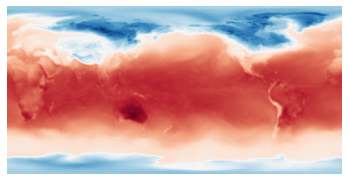

In [16]:
plt.imshow(dsets[0][::4, ::4], cmap='RdBu_r')
plt.axis('off')
plt.show()

## Connecting those hdf5 files to a Dask array

We first create a list of dask arrays, and stack it on a single one. Like this, from the point of vew of the programmer, it feels like there is only a single hdf5 on disk.

In [7]:
arrays = [da.from_array(dset, chunks=(500, 500)) for dset in dsets]
len(arrays)

31

In [8]:
x = da.stack(arrays, axis=0)
x

,Array,Chunk
Bytes,16.46 GB,2.00 MB
Shape,"(31, 5760, 11520)","(1, 500, 500)"
Count,17887 Tasks,8928 Chunks
Type,float64,numpy.ndarray


In [9]:
x.nbytes / 1024.

16070400.0

In [10]:
x[0]

dask.array<getitem, shape=(5760, 11520), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

At this point, nothing is loaded in memory.

In [12]:
result = x.mean(axis=0)
# result.compute()

Note that on the next cells we plot the data, but we don't call the `compute` method. This is because matplotlib *undaskifies* the array. In general that happens with functions that expect a numpy array.

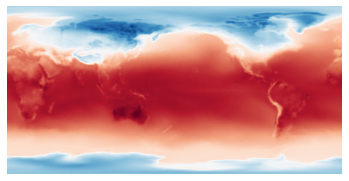

In [17]:
# plot the mean
result = x.mean(axis=0)

plt.imshow(result, cmap='RdBu_r')
plt.axis('off')
plt.show()

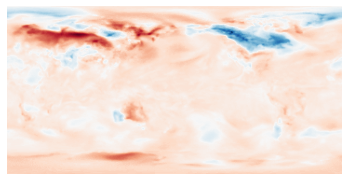

In [18]:
# plot the difference between day 1 and the mean.
result = x[0] - x.mean(axis=0)

plt.imshow(result, cmap='RdBu_r')
plt.axis('off')
plt.show()